In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('adult.csv')
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## Exploratory Data Analysis

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### Lets check the null values without using visualization

In [5]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

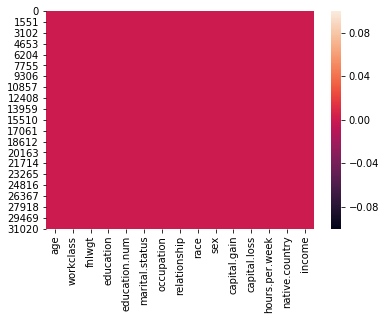

In [6]:
#Check the Null value through graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [7]:
data = pd.DataFrame(data=data)
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [8]:
data.shape

(32561, 15)

In [9]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [10]:
dataw = data['workclass'].unique()

In [11]:
dataw

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [12]:
data['workclass'].mode()

0    Private
dtype: object

#### Converting the Workclass Dataset to Numeric(boolean) Format

In [16]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [17]:
array = data['workclass']

array.shape

(32561,)

In [18]:
le=LabelEncoder()
data1=le.fit_transform(data['workclass'])
data1

array([0, 4, 0, ..., 4, 4, 4])

In [19]:
data['workclass']=data1

In [20]:
data['workclass'].unique()

array([0, 4, 7, 1, 6, 5, 2, 8, 3], dtype=int64)

In [21]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,4,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,0,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,4,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,4,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,4,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,4,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,4,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


#### Converting education Column to Numeric(boolean) Format

In [22]:
data['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [23]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [24]:
array = data['education']

array.shape

(32561,)

In [25]:
le=LabelEncoder()
data2=le.fit_transform(data['education'])
data2

array([11, 11, 15, ..., 11, 11, 11])

In [26]:
data['education']=data2

In [27]:
data['education'].unique()

array([11, 15,  5,  0, 10, 14,  9, 12,  1,  7,  8,  3,  4,  2,  6, 13],
      dtype=int64)

In [28]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,4,132870,11,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,0,186061,15,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,4,140359,5,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,4,264663,15,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,4,257302,7,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,4,154374,11,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,4,151910,11,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


#### Converting the columns those who are having 2 attribute

In [29]:
#For all those columns who has 2 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==2):#Unique values
        le_anima3 = preprocessing.LabelEncoder()
        data[cols] = le_anima3.fit_transform(data[cols])

In [30]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,Widowed,?,Not-in-family,White,0,0,4356,40,United-States,0
1,82,4,132870,11,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0
2,66,0,186061,15,10,Widowed,?,Unmarried,Black,0,0,4356,40,United-States,0
3,54,4,140359,5,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0
4,41,4,264663,15,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,Never-married,Protective-serv,Not-in-family,White,1,0,0,40,United-States,0
32557,27,4,257302,7,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,0
32558,40,4,154374,11,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,1
32559,58,4,151910,11,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,0


In [31]:
data['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

#### Converting the column race into boolean

In [32]:
#For all those columns who has 5 attributes
from sklearn import preprocessing
for cols in data.columns:
    if(len(data[cols].value_counts()) ==5):#Unique values
        le_anima3 = preprocessing.LabelEncoder()
        data[cols] = le_anima3.fit_transform(data[cols])

In [33]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,Widowed,?,Not-in-family,4,0,0,4356,40,United-States,0
1,82,4,132870,11,9,Widowed,Exec-managerial,Not-in-family,4,0,0,4356,18,United-States,0
2,66,0,186061,15,10,Widowed,?,Unmarried,2,0,0,4356,40,United-States,0
3,54,4,140359,5,4,Divorced,Machine-op-inspct,Unmarried,4,0,0,3900,40,United-States,0
4,41,4,264663,15,10,Separated,Prof-specialty,Own-child,4,0,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,Never-married,Protective-serv,Not-in-family,4,1,0,0,40,United-States,0
32557,27,4,257302,7,12,Married-civ-spouse,Tech-support,Wife,4,0,0,0,38,United-States,0
32558,40,4,154374,11,9,Married-civ-spouse,Machine-op-inspct,Husband,4,1,0,0,40,United-States,1
32559,58,4,151910,11,9,Widowed,Adm-clerical,Unmarried,4,0,0,0,40,United-States,0


In [34]:
data['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

#### Converting the native.country Column to Numeric(boolean) Format

In [35]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [36]:
array = data['native.country']

array.shape

(32561,)

In [37]:
le=LabelEncoder()
data3=le.fit_transform(data['native.country'])
data3

array([39, 39, 39, ..., 39, 39, 39])

In [38]:
data['native.country']=data3

In [39]:
data['native.country'].unique()

array([39,  0, 26, 12, 40,  3, 36, 19, 30, 38,  2, 35, 15, 33, 31, 20,  9,
       11, 22, 24, 17, 16,  5, 21,  1, 29, 27,  6, 14,  8, 18,  4, 13, 23,
        7, 10, 41, 34, 32, 25, 37, 28], dtype=int64)

In [40]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,Widowed,?,Not-in-family,4,0,0,4356,40,39,0
1,82,4,132870,11,9,Widowed,Exec-managerial,Not-in-family,4,0,0,4356,18,39,0
2,66,0,186061,15,10,Widowed,?,Unmarried,2,0,0,4356,40,39,0
3,54,4,140359,5,4,Divorced,Machine-op-inspct,Unmarried,4,0,0,3900,40,39,0
4,41,4,264663,15,10,Separated,Prof-specialty,Own-child,4,0,0,3900,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,Never-married,Protective-serv,Not-in-family,4,1,0,0,40,39,0
32557,27,4,257302,7,12,Married-civ-spouse,Tech-support,Wife,4,0,0,0,38,39,0
32558,40,4,154374,11,9,Married-civ-spouse,Machine-op-inspct,Husband,4,1,0,0,40,39,1
32559,58,4,151910,11,9,Widowed,Adm-clerical,Unmarried,4,0,0,0,40,39,0


#### Converting the relationship Column to Numeric(boolean) Format

In [41]:
data['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [42]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [43]:
array = data['relationship']

array.shape

(32561,)

In [44]:
le=LabelEncoder()
data4=le.fit_transform(data['relationship'])
data4

array([1, 1, 4, ..., 0, 4, 3])

In [45]:
data['relationship']=data4

In [46]:
data['relationship'].unique()

array([1, 4, 3, 2, 0, 5], dtype=int64)

In [47]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,Widowed,?,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,Widowed,Exec-managerial,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,Widowed,?,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,Divorced,Machine-op-inspct,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,Separated,Prof-specialty,3,4,0,0,3900,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,Never-married,Protective-serv,1,4,1,0,0,40,39,0
32557,27,4,257302,7,12,Married-civ-spouse,Tech-support,5,4,0,0,0,38,39,0
32558,40,4,154374,11,9,Married-civ-spouse,Machine-op-inspct,0,4,1,0,0,40,39,1
32559,58,4,151910,11,9,Widowed,Adm-clerical,4,4,0,0,0,40,39,0


#### Converting the marital.status Column to Numeric(boolean) Format

In [48]:
data['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [49]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [50]:
array = data['marital.status']

array.shape

(32561,)

In [51]:
le=LabelEncoder()
data5=le.fit_transform(data['marital.status'])
data5

array([6, 6, 6, ..., 2, 6, 4])

In [52]:
data['marital.status']=data5

In [53]:
data['marital.status'].unique()

array([6, 0, 5, 4, 2, 3, 1], dtype=int64)

In [54]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,?,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,Exec-managerial,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,?,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,Machine-op-inspct,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,Prof-specialty,3,4,0,0,3900,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,4,Protective-serv,1,4,1,0,0,40,39,0
32557,27,4,257302,7,12,2,Tech-support,5,4,0,0,0,38,39,0
32558,40,4,154374,11,9,2,Machine-op-inspct,0,4,1,0,0,40,39,1
32559,58,4,151910,11,9,6,Adm-clerical,4,4,0,0,0,40,39,0


#### Converting the occupation Column to Numeric(boolean) Format

In [55]:
data['occupation'].unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [56]:
import sklearn 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [57]:
array = data['occupation']

array.shape

(32561,)

In [58]:
le=LabelEncoder()
data6=le.fit_transform(data['occupation'])
data6

array([0, 4, 0, ..., 7, 1, 1])

In [59]:
data['occupation']=data6

In [60]:
data['occupation'].unique()

array([ 0,  4,  7, 10,  8,  1,  3, 14,  6, 12,  5, 13, 11,  2,  9],
      dtype=int64)

In [61]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
32557,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32558,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32559,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [62]:
data['income'].unique()

array([0, 1], dtype=int64)

In [63]:
data = pd.DataFrame(data=data)
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,4,310152,15,10,4,11,1,4,1,0,0,40,39,0
32557,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32558,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32559,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0


In [64]:
data.shape

(32561, 15)

In [65]:
data.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education.num     int64
marital.status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital.gain      int64
capital.loss      int64
hours.per.week    int64
native.country    int32
income            int32
dtype: object

In [66]:
data.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [67]:
dfcor = data.corr()
dfcor

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
education.num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
marital.status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
sex,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980


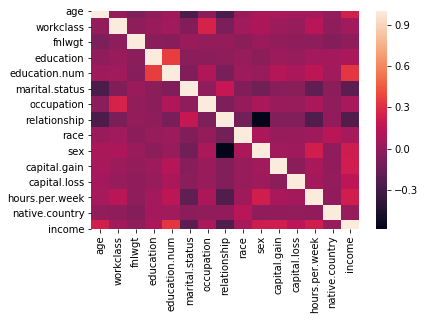

In [68]:
sns.heatmap(dfcor)

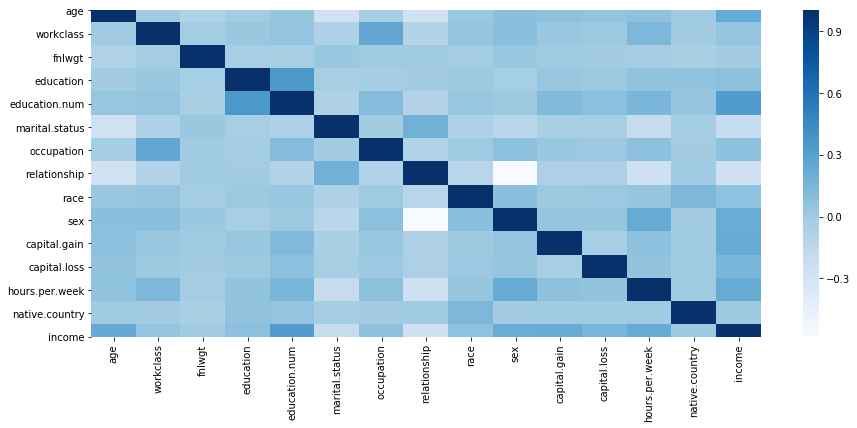

In [69]:
plt.figure(figsize=(15,6))
sns.heatmap(dfcor,cmap='Blues',annot=False)

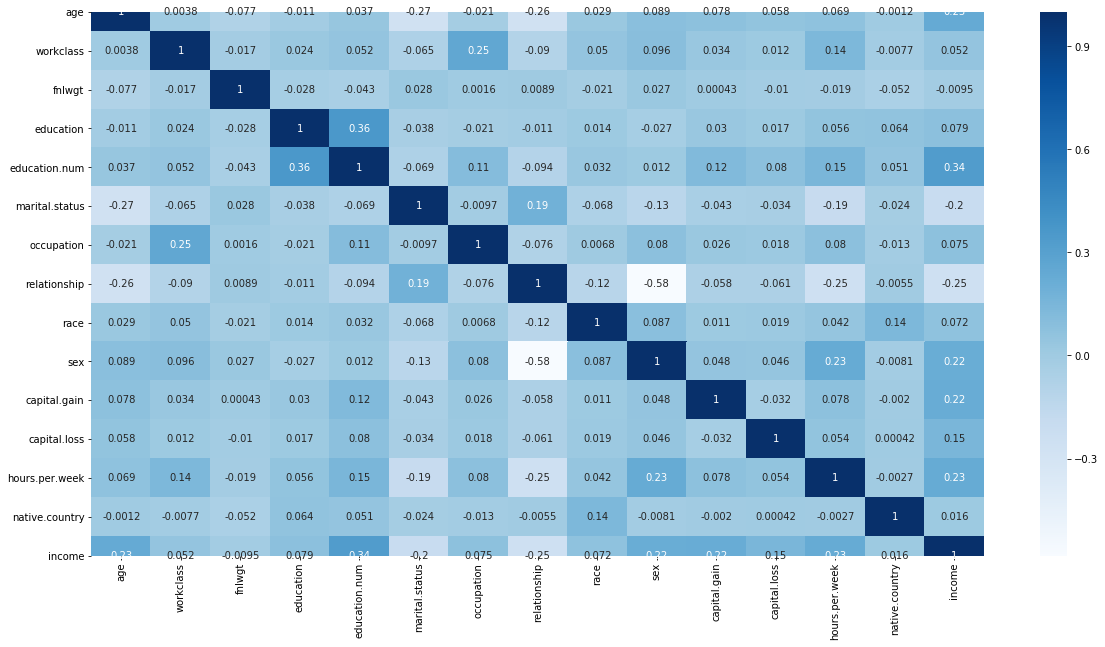

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,cmap='Blues',annot=True)

In [71]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(32561, 15)
(27418, 15)


#### Checking Skewness and Removing it

In [72]:
#Check Skewness 
data.skew()
#there is some skewness which need to be treated,by seeing we can say only +ve skewness is significant and needs to be treated
#if value is 0.55 or more than that then there would be a skewed value

age                0.558743
workclass         -0.752024
fnlwgt             1.446980
education         -0.934042
education.num     -0.311676
marital.status    -0.013508
occupation         0.114583
relationship       0.786818
race              -2.435386
sex               -0.719293
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
native.country    -3.658303
income             1.212430
dtype: float64

In [73]:
#Treating the skewness using log
import numpy as np
for col in data.columns:
#Here complete column name has been passed
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [74]:
#Lets Again Check the Skewness
data.skew()

age              -0.113341
workclass        -0.752024
fnlwgt           -0.842461
education        -0.934042
education.num    -0.311676
marital.status   -0.013508
occupation        0.114583
relationship      0.284982
race             -2.435386
sex              -0.719293
capital.gain      3.096144
capital.loss      4.307537
hours.per.week    0.227643
native.country   -3.658303
income            1.212430
dtype: float64

In [75]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,4.510860,0,11.252262,11,9,6,0,0.693147,4,0,0.0,8.379539,40,39,0.000000
1,4.418841,4,11.797134,11,9,6,4,0.693147,4,0,0.0,8.379539,18,39,0.000000
2,4.204693,0,12.133835,15,10,6,0,1.609438,2,0,0.0,8.379539,40,39,0.000000
3,4.007333,4,11.851966,5,4,0,7,1.609438,4,0,0.0,8.268988,40,39,0.000000
4,3.737670,4,12.486216,15,10,5,10,1.386294,4,0,0.0,8.268988,40,39,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3.135494,4,12.644821,15,10,4,11,0.693147,4,1,0.0,0.000000,40,39,0.000000
32557,3.332205,4,12.458010,7,12,2,13,1.791759,4,0,0.0,0.000000,38,39,0.000000
32558,3.713572,4,11.947140,11,9,2,7,0.000000,4,1,0.0,0.000000,40,39,0.693147
32559,4.077537,4,11.931050,11,9,6,1,1.609438,4,0,0.0,0.000000,40,39,0.000000


In [76]:
data['income'].unique()

array([0.        , 0.69314718])

In [77]:
import sklearn 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [78]:
array = data['income']

array.shape

(32561,)

In [79]:
le=LabelEncoder()
data7=le.fit_transform(data['income'])
data7

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [80]:
data['income']=data7

In [81]:
data['income'].unique()

array([0, 1], dtype=int64)

In [82]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,4.510860,0,11.252262,11,9,6,0,0.693147,4,0,0.0,8.379539,40,39,0
1,4.418841,4,11.797134,11,9,6,4,0.693147,4,0,0.0,8.379539,18,39,0
2,4.204693,0,12.133835,15,10,6,0,1.609438,2,0,0.0,8.379539,40,39,0
3,4.007333,4,11.851966,5,4,0,7,1.609438,4,0,0.0,8.268988,40,39,0
4,3.737670,4,12.486216,15,10,5,10,1.386294,4,0,0.0,8.268988,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3.135494,4,12.644821,15,10,4,11,0.693147,4,1,0.0,0.000000,40,39,0
32557,3.332205,4,12.458010,7,12,2,13,1.791759,4,0,0.0,0.000000,38,39,0
32558,3.713572,4,11.947140,11,9,2,7,0.000000,4,1,0.0,0.000000,40,39,1
32559,4.077537,4,11.931050,11,9,6,1,1.609438,4,0,0.0,0.000000,40,39,0


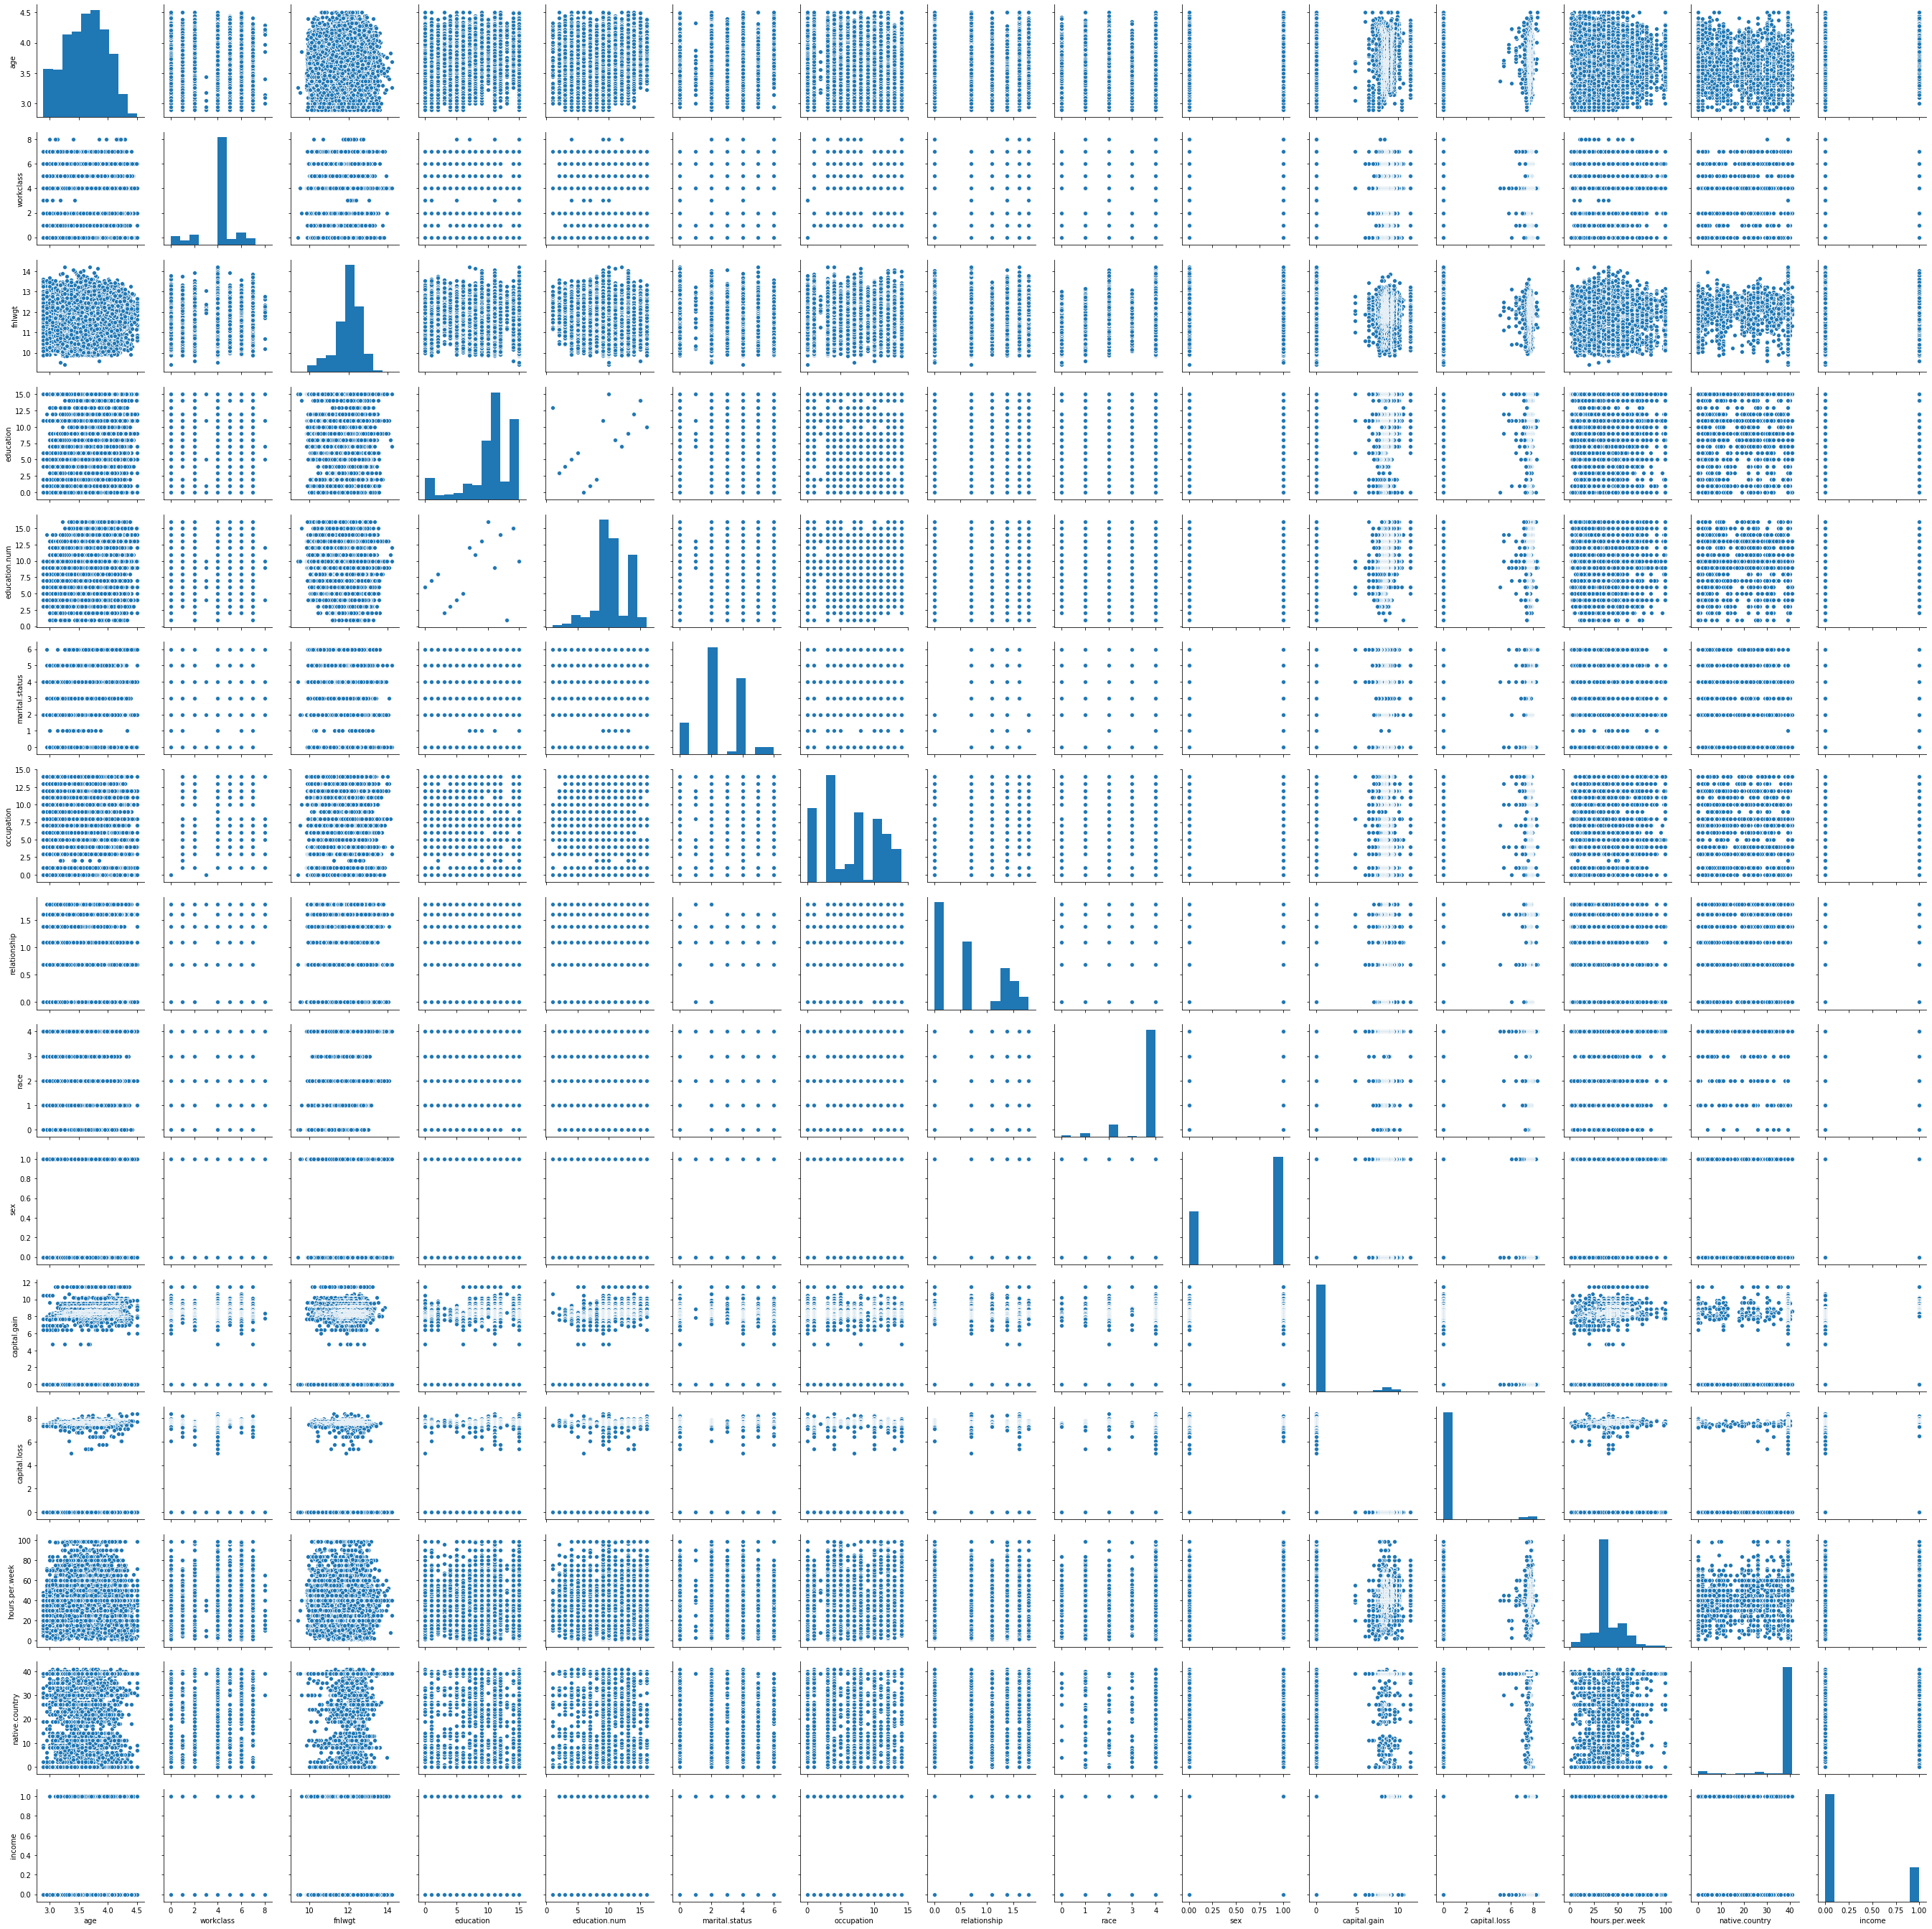

In [83]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(data)
plt.show()

### LinePlot

In [84]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

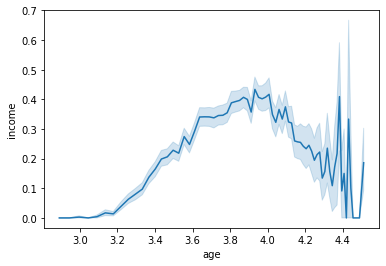

In [85]:
#Lets check the how age is changing with respect to income
sns.lineplot(data["age"],data["income"])
plt.show()

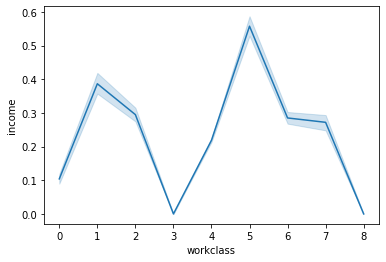

In [86]:
#Lets check the how workclass is changing with respect to income
sns.lineplot(data["workclass"],data["income"])
plt.show()

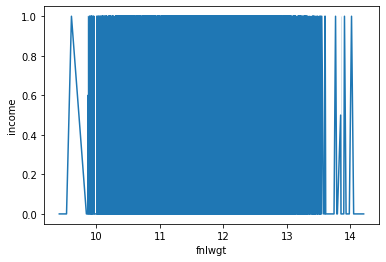

In [87]:
#Lets check the how fnlwgt is changing with respect to income
sns.lineplot(data["fnlwgt"],data["income"])
plt.show()

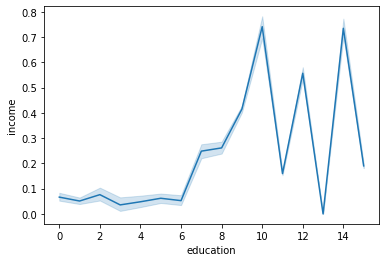

In [88]:
#Lets check the how education is changing with respect to income
sns.lineplot(data["education"],data["income"])
plt.show()

#### Plotting Boxplot through Iteration

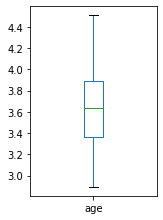

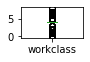

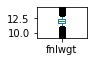

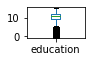

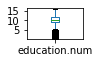

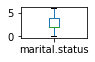

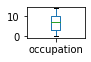

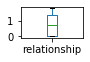

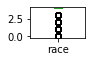

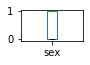

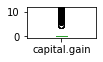

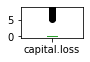

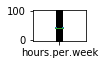

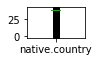

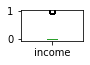

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    data.boxplot(col)
    plt.grid()
    plt.tight_layout()
    plt.show()

#### Plotting Displot Through Iteration

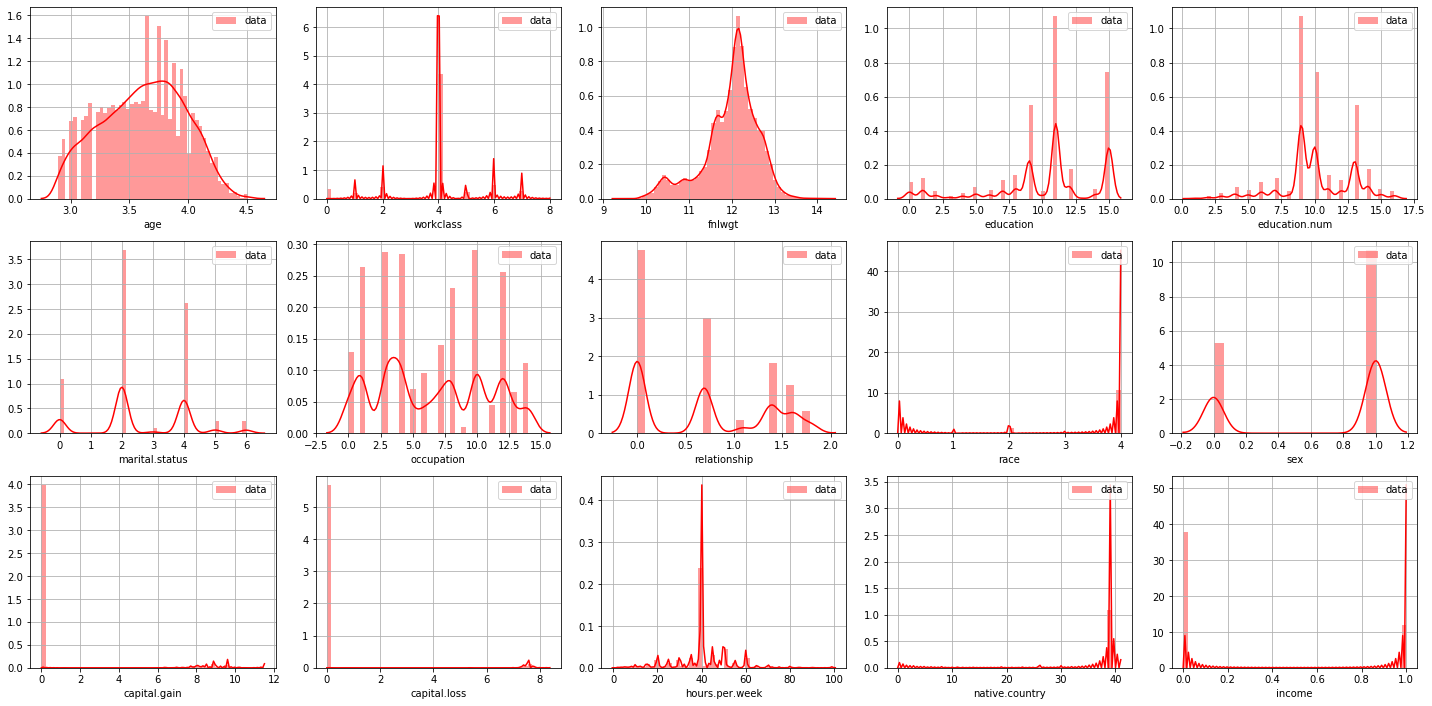

In [90]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(data.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(data[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

### Plotting Data using Scatter Plot

In [91]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

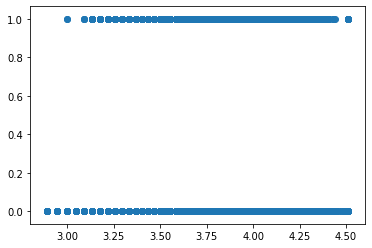

In [92]:
plt.scatter(data['age'],data['income'])

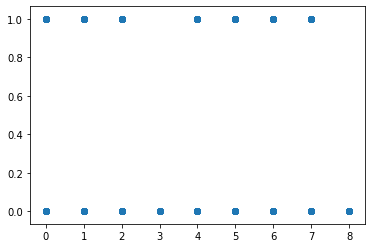

In [93]:
plt.scatter(data['workclass'],data['income'])

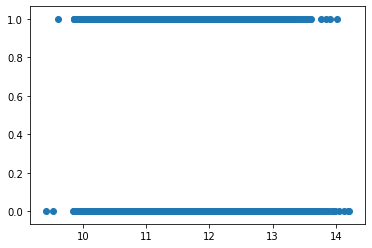

In [94]:
plt.scatter(data['fnlwgt'],data['income'])

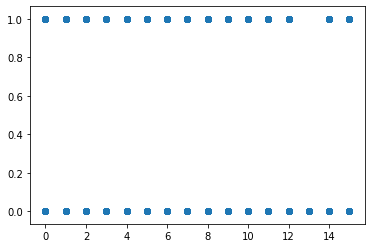

In [95]:
plt.scatter(data['education'],data['income'])

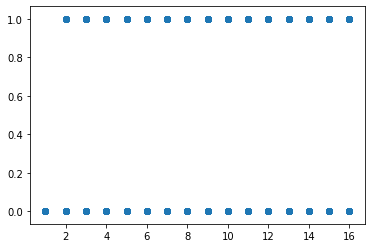

In [96]:
plt.scatter(data['education.num'],data['income'])

#### Separating X and Y Variable

In [97]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,4.510860,0,11.252262,11,9,6,0,0.693147,4,0,0.0,8.379539,40,39,0
1,4.418841,4,11.797134,11,9,6,4,0.693147,4,0,0.0,8.379539,18,39,0
2,4.204693,0,12.133835,15,10,6,0,1.609438,2,0,0.0,8.379539,40,39,0
3,4.007333,4,11.851966,5,4,0,7,1.609438,4,0,0.0,8.268988,40,39,0
4,3.737670,4,12.486216,15,10,5,10,1.386294,4,0,0.0,8.268988,40,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3.135494,4,12.644821,15,10,4,11,0.693147,4,1,0.0,0.000000,40,39,0
32557,3.332205,4,12.458010,7,12,2,13,1.791759,4,0,0.0,0.000000,38,39,0
32558,3.713572,4,11.947140,11,9,2,7,0.000000,4,1,0.0,0.000000,40,39,1
32559,4.077537,4,11.931050,11,9,6,1,1.609438,4,0,0.0,0.000000,40,39,0


In [98]:
X = data.drop("income", axis=1)

In [99]:
X

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,4.510860,0,11.252262,11,9,6,0,0.693147,4,0,0.0,8.379539,40,39
1,4.418841,4,11.797134,11,9,6,4,0.693147,4,0,0.0,8.379539,18,39
2,4.204693,0,12.133835,15,10,6,0,1.609438,2,0,0.0,8.379539,40,39
3,4.007333,4,11.851966,5,4,0,7,1.609438,4,0,0.0,8.268988,40,39
4,3.737670,4,12.486216,15,10,5,10,1.386294,4,0,0.0,8.268988,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3.135494,4,12.644821,15,10,4,11,0.693147,4,1,0.0,0.000000,40,39
32557,3.332205,4,12.458010,7,12,2,13,1.791759,4,0,0.0,0.000000,38,39
32558,3.713572,4,11.947140,11,9,2,7,0.000000,4,1,0.0,0.000000,40,39
32559,4.077537,4,11.931050,11,9,6,1,1.609438,4,0,0.0,0.000000,40,39


In [100]:
Y = data["income"]
Y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

In [101]:
Y.shape

(32561,)

In [102]:
Y = Y.values.reshape(-1,1)

In [103]:
Y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [104]:
Y.shape

(32561, 1)

In [105]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=.22,random_state=39)

In [106]:
train_X.shape

(25397, 14)

In [107]:
test_X.shape

(7164, 14)

In [108]:
train_Y.shape

(25397, 1)

In [109]:
test_Y.shape

(7164, 1)

#### Applying Logistic Regression

In [110]:
lg=LogisticRegression()

In [111]:
lg.fit(train_X,train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
pred=lg.predict(test_X)
print(pred)

[0 0 0 ... 0 0 1]


In [113]:
print("accuracy score:",accuracy_score(pred,test_Y))

accuracy score: 0.8257956448911222


In [114]:
print(confusion_matrix(test_Y,pred))

[[5107  351]
 [ 897  809]]


In [115]:
print(classification_report(test_Y,pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5458
           1       0.70      0.47      0.56      1706

    accuracy                           0.83      7164
   macro avg       0.77      0.70      0.73      7164
weighted avg       0.81      0.83      0.81      7164



#### Using Cross Validation to Check Overfitting,Underfitting and Predict the Result

In [116]:
from sklearn.model_selection import cross_val_score
accuracycvlg1 = cross_val_score(lg,X,Y,cv=10,scoring='accuracy').mean()
print(accuracycvlg1)

0.7962676307088342


In [117]:
from sklearn.model_selection import cross_val_score
accuracycvlg2 = cross_val_score(lg,X,Y,cv=15,scoring='accuracy').mean()
print(accuracycvlg2)

0.7937115913511509


#### Grid Search Cross Validation for Logistic Regression

In [118]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lg1=LogisticRegression()
lg1_cv=GridSearchCV(lg1,grid,cv=10)
lg1_cv.fit(train_X,train_Y)

print("tuned hpyerparameters :(best parameters) ",lg1_cv.best_params_)
print("accuracy :",lg1_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.8248218293499232


In [119]:
lg2=LogisticRegression(C=1000.0,penalty="l2")
lg2.fit(train_X,train_Y)
print("score",lg2.score(test_X,test_Y))

score 0.8239810161920714


#### Boost the Dataset by AdaBoost and GradiantBoost

In [120]:
from sklearn.ensemble import AdaBoostClassifier
modelad = AdaBoostClassifier()
modelad.fit(train_X,train_Y)
print(modelad.score(train_X,train_Y))
abpred=modelad.predict(test_X)
print(abpred)
modelad.score(test_X,test_Y)

0.8596290900500059
[1 0 0 ... 0 0 1]


0.8588777219430486

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
modelgb=GradientBoostingClassifier()
modelgb.fit(train_X,train_Y)
print(modelgb.score(train_X,train_Y))
abpred=modelgb.predict(test_X)
print(abpred)
modelgb.score(test_X,test_Y)

0.8686065283301178
[1 0 0 ... 0 0 1]


0.8692071468453378

### Boosting though GradientBoost Regressor By using Parameters

In [122]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(train_X, train_Y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [123]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = modelgbr.score(train_X,train_Y)
print("model_Score:",model_score)

print('R2 sq: ',model_score)
y_predictedgbr = modelgbr.predict(test_X)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(test_Y, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(test_Y, y_predictedgbr))

model_Score: 0.4921359390086166
R2 sq:  0.4921359390086166
Mean squared error: 0.09
Test Variance score: 0.48


### Lets Visualize the Goodness of the Prediction

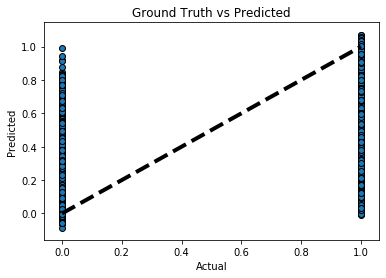

In [124]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(test_Y, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([test_Y.min(), test_Y.max()], [test_Y.min(), test_Y.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### Prediction Using Naive Bayes Algo

In [125]:
mb=MultinomialNB()
mb.fit(train_X,train_Y)


predmb = mb.predict(test_X)
print(accuracy_score(test_Y,predmb))
print(confusion_matrix(test_Y,predmb))
print(classification_report(test_Y,predmb))

0.7769402568397543
[[4983  475]
 [1123  583]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      5458
           1       0.55      0.34      0.42      1706

    accuracy                           0.78      7164
   macro avg       0.68      0.63      0.64      7164
weighted avg       0.75      0.78      0.76      7164



### Multinomial NB by using Crossval Score

In [126]:
#Cross validation libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
mbn=MultinomialNB()

score=cross_val_score(mbn,X,Y,cv=15)
print('Score:',score)

print('Mean Scores',score.mean())
print('Standard deviation',score.std())

y_pred = cross_val_predict(mbn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)
conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Score: [0.24090281 0.92445877 0.98065408 0.98433901 0.91110088 0.76232151
 0.75817596 0.75909719 0.75771534 0.75541225 0.75310917 0.75760369
 0.75714286 0.76175115 0.76221198]
Mean Scores 0.7750664427967886
Standard deviation 0.16634431211219747
Y Prediction values
[1 1 1 ... 0 0 0]


array([[22598,  2122],
       [ 5223,  2618]], dtype=int64)

### Pediction using Support Vector Machine

In [127]:
svc = SVC(kernel='rbf')
svc.fit(train_X,train_Y)
svc.score(train_X,train_Y)
predsvc=svc.predict(test_X)
print(accuracy_score(test_Y,predsvc))
print(confusion_matrix(test_Y,predsvc))
print(classification_report(test_Y,predsvc))

0.8299832495812395
[[5157  301]
 [ 917  789]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5458
           1       0.72      0.46      0.56      1706

    accuracy                           0.83      7164
   macro avg       0.79      0.70      0.73      7164
weighted avg       0.82      0.83      0.82      7164



### Support Vector Machine by using Crossval Score

In [128]:
sv = SVC()

score=cross_val_score(sv,X,Y,cv=5,scoring='accuracy')
print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(sv,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(Y,y_pred)

accuracy Score= [0.72163366 0.80236486 0.80804668 0.81326781 0.80820025]
Mean Scores 0.7907026525289998
Standard Deviation 0.034706486860675706
Y Prediction values
[0 0 0 ... 0 0 0]


0.7907005313104635

### Use GridSearchCV for Support Vector Machine

In [129]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
gridsv = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
gridsv.fit(train_X, train_Y)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.765, total= 1.1min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.764, total=  59.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.0min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.763, total= 1.1min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.793, total=  26.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.790, total=  20.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.790, total=  28.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.807, total=  13.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.811, total=  13.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.806, total=  13.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.780, total= 2.3min
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.778, total= 2.4min
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.778, total= 4.6min
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.799, total= 1.4min
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.792, total= 1.9min
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.785, total= 1.5min
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.820, total= 1.3min
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 69.7min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [130]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridsv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridsv.best_estimator_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [131]:
# Re-run predictions and see classification report 

grid_predictions = gridsv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5458
           1       0.74      0.51      0.61      1706

    accuracy                           0.84      7164
   macro avg       0.80      0.73      0.75      7164
weighted avg       0.83      0.84      0.83      7164



### Prediction Using DecisionTreeClassifier

In [132]:
dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_Y)
dtc.score(train_X,train_Y)
preddtc=dtc.predict(test_X)
print(accuracy_score(test_Y,preddtc))
print(confusion_matrix(test_Y,preddtc))
print(classification_report(test_Y,preddtc))

0.812534896705751
[[4771  687]
 [ 656 1050]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      5458
           1       0.60      0.62      0.61      1706

    accuracy                           0.81      7164
   macro avg       0.74      0.74      0.74      7164
weighted avg       0.81      0.81      0.81      7164



### DecisionTreeClassifier by using Crossval Score

In [133]:
dt=DecisionTreeClassifier(criterion='gini')
score=cross_val_score(dt,X,Y,cv=5,scoring='f1_macro')

print('F1-score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(dt,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

F1-score: [0.66986385 0.56396396 0.68240339 0.6860323  0.67590647]
Mean Scores 0.6556339962337084
Standard Deviation 0.04616820199068727
Y Prediction values
[0 0 1 ... 0 0 0]


array([[20654,  4066],
       [ 3980,  3861]], dtype=int64)

### Using GridSearchCV for DecisionTreeClassifier

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dt_grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
dt_grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   42.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16

In [135]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(dt_grid_search_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(dt_grid_search_cv.best_estimator_)

{'max_leaf_nodes': 76, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=76,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [136]:
# Re-run predictions and see classification report 

grid_predictions = dt_grid_search_cv.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      5458
           1       0.75      0.62      0.68      1706

    accuracy                           0.86      7164
   macro avg       0.82      0.78      0.79      7164
weighted avg       0.85      0.86      0.86      7164



### Boost Decision Tree Classifier

In [137]:
from sklearn.ensemble import AdaBoostClassifier

dtbclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200
)
dtbclassifier.fit(train_X, train_Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [138]:
predictions = dtbclassifier.predict(test_X)
predictions

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [139]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.870463428252373


In [140]:
confusion_matrix(test_Y, predictions)

array([[5143,  315],
       [ 613, 1093]], dtype=int64)

### Prediction Using KNN Nearest Neighbor

In [141]:
#k = 10
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
knn.score(train_X,train_Y)
predknn=knn.predict(test_X)
print(accuracy_score(test_Y,predknn))
print(confusion_matrix(test_Y,predknn))
print(classification_report(test_Y,predknn))

0.8136515912897823
[[4858  600]
 [ 735  971]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      5458
           1       0.62      0.57      0.59      1706

    accuracy                           0.81      7164
   macro avg       0.74      0.73      0.74      7164
weighted avg       0.81      0.81      0.81      7164



### KNN Nearest Neighbor by using Crossval Score 

In [142]:
# k=10

kn=KNeighborsClassifier()

score=cross_val_score(kn,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(kn,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.55234879 0.87100737 0.81234644 0.80558968 0.80128993 0.80159705
 0.81265356 0.80374693 0.80773956 0.79883292]
Mean Scores 0.7867152227030949
Standard Deviation 0.08064218828771146
Y Prediction values
[0 0 0 ... 0 0 0]
y_pred.shape (32561,)


array([[21726,  2994],
       [ 3817,  4024]], dtype=int64)

### Use GridSearchCV for KNN Nearest Neighbor

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [144]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn1 = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn1, train_X, train_Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.7882421652002518, 0.8085996135331515, 0.8086788032709313, 0.8202549251621589, 0.8155689710277073, 0.8207269630573535, 0.8170646930923271, 0.8214747931933368, 0.8183642933563513, 0.8199390810852553, 0.819073342317226, 0.8206870661849583, 0.8202542897889394, 0.82068734516115, 0.8195059482189798, 0.8204116150913612, 0.818167349925836, 0.8200178367244618, 0.8192301715941694, 0.8193486692640988, 0.8191513694731697, 0.8209625638457817, 0.8193087258244771, 0.8206476806489015, 0.819938941591057, 0.820135947070525, 0.8191517259190165, 0.8193880394770913, 0.8187187325225299, 0.8186397753401726]


In [145]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
knn1 = KNeighborsClassifier(n_neighbors=k)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [146]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [147]:
# instantiate the grid
gridknn = GridSearchCV(knn1, param_grid, cv=10, scoring='accuracy')

In [148]:
# fit the grid with data
gridknn.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [149]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(gridknn.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(gridknn.best_estimator_)

{'n_neighbors': 8}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')


In [150]:
# Re-run predictions and see classification report 

grid_predictions = gridknn.predict(test_X) 
  
# print classification report 
print(classification_report(test_Y, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      5458
           1       0.67      0.50      0.57      1706

    accuracy                           0.82      7164
   macro avg       0.76      0.71      0.73      7164
weighted avg       0.81      0.82      0.81      7164



#### Bagging of KNN Nearest Neighbor 

In [151]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [152]:
baggingknn.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [153]:
predictions = baggingknn.predict(test_X)
predictions

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [154]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictions))

0.8464544946957008


In [155]:
confusion_matrix(test_Y, predictions)

array([[5256,  202],
       [ 898,  808]], dtype=int64)

### Prediction Using RandomForest Classification

In [156]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X,train_Y)
rf.score(train_X,train_Y)
predf=rf.predict(test_X)
print(accuracy_score(test_Y,predf))
print(confusion_matrix(test_Y,predf))
print(classification_report(test_Y,predf))

0.8481295365717476
[[5076  382]
 [ 706 1000]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5458
           1       0.72      0.59      0.65      1706

    accuracy                           0.85      7164
   macro avg       0.80      0.76      0.78      7164
weighted avg       0.84      0.85      0.84      7164



### RandomForestClassifier Using Cross_Val_Score

In [157]:
# k=10

rf1=RandomForestClassifier()

score=cross_val_score(rf1,X,Y,cv=10,scoring='accuracy')

print('Accuracy score:',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred = cross_val_predict(rf1,X,Y,cv=5)

print('Y Prediction values')
print(y_pred)

print("y_pred.shape",y_pred.shape)

conf_mat = confusion_matrix(Y,y_pred)
conf_mat

Accuracy score: [0.53484802 0.90110565 0.74416462 0.79791155 0.81326781 0.80773956
 0.82831695 0.82493857 0.81879607 0.81265356]
Mean Scores 0.7883742368544334
Standard Deviation 0.09190833254121812
Y Prediction values
[0 0 0 ... 0 0 0]
y_pred.shape (32561,)


array([[22167,  2553],
       [ 4234,  3607]], dtype=int64)

### Using GridSearchCV for Random Forest Classifier

In [158]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf2 = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rf2 = GridSearchCV(estimator = rf2, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf2.fit(train_X,train_Y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 41.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [159]:
# inspection the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

# print best parameter after tuning 
print(grid_search_rf2.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search_rf2.best_estimator_)

{'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [160]:
# Re-run predictions and see classification report 

predictions = (grid_search_rf2.predict(test_X))
  
# print classification report 
print(classification_report(test_Y, predictions))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      5458
           1       0.77      0.63      0.69      1706

    accuracy                           0.87      7164
   macro avg       0.83      0.79      0.80      7164
weighted avg       0.86      0.87      0.86      7164



#### Bagging of Random Forest Classifier

In [162]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
baggingrf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

In [163]:
baggingrf.fit(train_X, train_Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=0.5,
                  max_samples=0.5, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [164]:
predictionsrf = baggingrf.predict(test_X)
predictionsrf

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [165]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y,predictionsrf))

0.8418481295365717


In [166]:
confusion_matrix(test_Y, predictionsrf)

array([[5178,  280],
       [ 853,  853]], dtype=int64)

#### NOTE::Among all models dtbclassifier gives the Highest accuracy(87%) so we are going to save this model

In [168]:
#Lets save the above model
from sklearn.externals import joblib

#Save the model as pickle in a file
joblib.dump(dtbclassifier,'Census Income.pkl')

['Census Income.pkl']